<a href="https://colab.research.google.com/github/sai8e/StockMarketProject/blob/main/Jonathan_Nope_Using_Python_%26_Machine_Learning_to_Predict_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This Program uses an artifical recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using past 60 day stock price.

In [1]:
# Import the Libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import io
import os
import csv
import glob
from google.colab import files

In [2]:
#Declare Variables
file_ex = ".csv"
compare_data = 'Average'
date = dt.datetime.now()
end_date = date.strftime('%Y') + '-' + date.strftime('%m') + '-' + date.strftime('%d')
start_date = str(int(date.strftime('%Y')) - 10) + '-' + date.strftime('%m') + '-' + date.strftime('%d')

In [3]:
#Build Ticker Library
all_filenames = [i for i in glob.glob(f"*{file_ex}")]
for file in all_filenames:
    os.remove(file)
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [4]:
#Declare Ticker
while True:
  ticker = input('Please input Ticker (Example "AAPL"):')
  try:
    df = pd.read_csv(ticker + file_ex)
    #df = pdr.DataReader(ticker, data_source='yahoo', start=start_date, end=end_date)
    break
  except:
    print('Sorry Ticker is not in database! Please Try Again')

Please input Ticker (Example "AAPL"):AAPL


In [5]:
print('TICKER: '+ ticker)
print(df)

TICKER: AAPL
            Date        High         Low  ...   Adj Close     Average  AVGChange
0     2011-11-01   14.267857   14.043571  ...   12.158928   14.177143  14.177143
1     2011-11-02   14.301429   14.111071  ...   12.186525   14.241072   0.063929
2     2011-11-03   14.407143   14.120000  ...   12.360089   14.323928   0.082857
3     2011-11-04   14.408571   14.255714  ...   12.273306   14.326250   0.002322
4     2011-11-07   14.285714   14.147500  ...   12.257664   14.279285  -0.046965
...          ...         ...         ...  ...         ...         ...        ...
2512  2021-10-26  150.839996  149.009995  ...  149.320007  149.325005   0.665009
2513  2021-10-27  149.729996  148.490005  ...  148.850006  149.105003  -0.220001
2514  2021-10-28  153.169998  149.720001  ...  152.570007  151.195007   2.090004
2515  2021-10-29  149.940002  146.410004  ...  149.800003  148.510002  -2.685005
2516  2021-11-01  149.699997  147.800003  ...  148.960007  148.972504   0.462502

[2517 rows x 9

In [6]:
df.shape

(2517, 9)

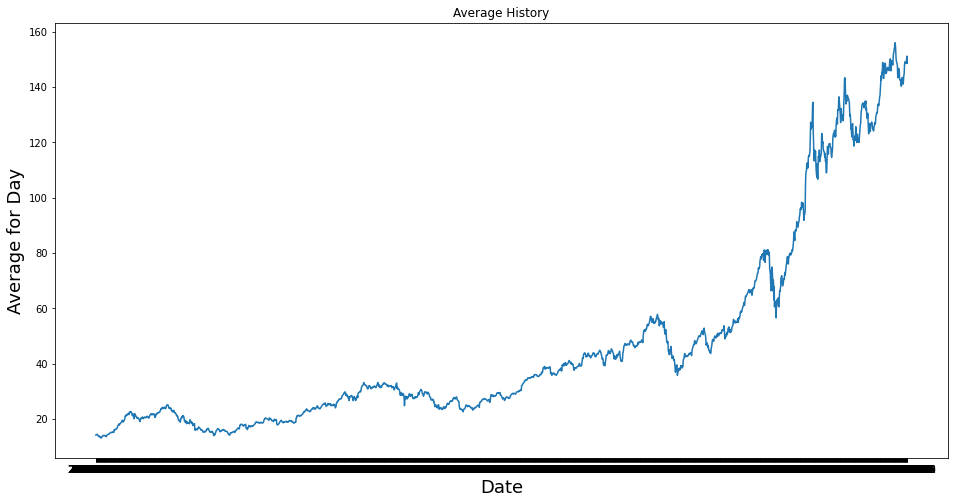

In [7]:
#Visualize Close Price
plt.figure(figsize=(16,8))
plt.title(compare_data + ' History')
plt.plot(df['Date'], df[compare_data])
plt.xlabel('Date', fontsize=18)
plt.ylabel(compare_data +' for Day', fontsize=18)
plt.show()

In [8]:
# create a new dataframe  with only the comapre_data column
data = df.filter([compare_data])
# convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the LSTM model
training_data_len = math.ceil(len(dataset)*.80)


In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [10]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i, 0])

In [11]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1954, 60, 1)

In [13]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1954/1954 [==============================] - 61s 30ms/step - loss: 2.1460e-04


In [16]:
# Create testing dataset
# Create new array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]
# Create data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [17]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [18]:
# Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(503, 60, 1)

In [19]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [20]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

7.3059291991277435

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


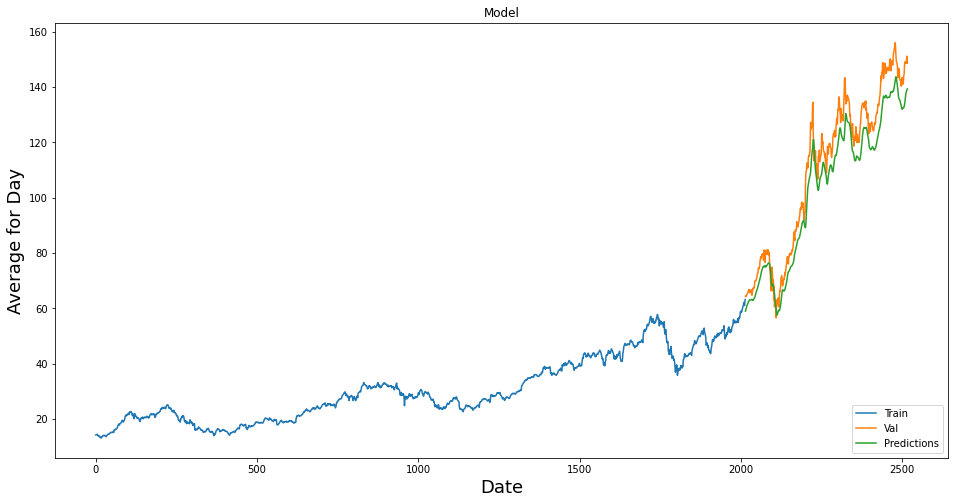

In [21]:
# Plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(compare_data +' for Day', fontsize=18)
plt.plot(train[compare_data])
plt.plot(valid[[compare_data, 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Show the valid and predicted price
valid

,Average,Predictions
2014,64.353748,58.936588
2015,64.272499,59.409443
2016,64.251247,59.893215
2017,64.771248,60.321632
2018,64.853752,60.730984
...,...,...
2512,149.325005,137.967545
2513,149.105003,138.461777
2514,151.195007,138.780975
2515,148.510002,139.260742
